# Understanding and Cleaning the Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df=pd.read_csv('adult_dataset.csv')

In [4]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education.num     32561 non-null int64
marital.status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital.gain      32561 non-null int64
capital.loss      32561 non-null int64
hours.per.week    32561 non-null int64
native.country    32561 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
# missing values are represented as ? , we copy all those values to another dataframe
df_missing= df[df.workclass == '?']


In [7]:
df_missing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1836 entries, 0 to 32544
Data columns (total 15 columns):
age               1836 non-null int64
workclass         1836 non-null object
fnlwgt            1836 non-null int64
education         1836 non-null object
education.num     1836 non-null int64
marital.status    1836 non-null object
occupation        1836 non-null object
relationship      1836 non-null object
race              1836 non-null object
sex               1836 non-null object
capital.gain      1836 non-null int64
capital.loss      1836 non-null int64
hours.per.week    1836 non-null int64
native.country    1836 non-null object
income            1836 non-null object
dtypes: int64(6), object(9)
memory usage: 229.5+ KB


As we can see out of 32k rows only 1836 rows are missing , we can drop them

In [8]:
#drop missing data
df= df[df.workclass != '?']

In [9]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K


In [10]:
# select all categorical variables
df_categorical = df.select_dtypes(include=['object'])

# checking whether any other columns contain a "?"
df_categorical.apply(lambda x: x=="?", axis=0).sum()

workclass           0
education           0
marital.status      0
occupation          7
relationship        0
race                0
sex                 0
native.country    556
income              0
dtype: int64

We will get rid of missing values even here

In [11]:
df = df[df['occupation'] != '?']
df = df[df['native.country'] != '?']

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 1 to 32560
Data columns (total 15 columns):
age               30162 non-null int64
workclass         30162 non-null object
fnlwgt            30162 non-null int64
education         30162 non-null object
education.num     30162 non-null int64
marital.status    30162 non-null object
occupation        30162 non-null object
relationship      30162 non-null object
race              30162 non-null object
sex               30162 non-null object
capital.gain      30162 non-null int64
capital.loss      30162 non-null int64
hours.per.week    30162 non-null int64
native.country    30162 non-null object
income            30162 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Now our data set doesnot contain any missing values

# Data Preparation

Firstly, note that we have both categorical and numeric features as predictors. In previous models such as linear and logistic regression, we had created dummy variables for categorical variables, since those models (being mathematical equations) can process only numeric variables.

All that is not required in decision trees, since they can process categorical variables easily. However, we still need to encode the categorical variables into a standard format so that sklearn can understand them and build the tree. We'll do that using the LabelEncoder() class, which comes with

In [13]:
# select all categorical variables after dropping ?  values
df_categorical = df.select_dtypes(include=['object'])
df_categorical.head()

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
1,Private,HS-grad,Widowed,Exec-managerial,Not-in-family,White,Female,United-States,<=50K
3,Private,7th-8th,Divorced,Machine-op-inspct,Unmarried,White,Female,United-States,<=50K
4,Private,Some-college,Separated,Prof-specialty,Own-child,White,Female,United-States,<=50K
5,Private,HS-grad,Divorced,Other-service,Unmarried,White,Female,United-States,<=50K
6,Private,10th,Separated,Adm-clerical,Unmarried,White,Male,United-States,<=50K


In [14]:
# apply label encoding
from sklearn import preprocessing
le= preprocessing.LabelEncoder()
df_categorical = df_categorical.apply(le.fit_transform)

In [15]:
df_categorical.head()

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
1,2,11,6,3,1,4,0,38,0
3,2,5,0,6,4,4,0,38,0
4,2,15,5,9,3,4,0,38,0
5,2,11,0,7,4,4,0,38,0
6,2,0,5,0,4,4,1,38,0


In [16]:
# concat df_categorical with original df
df = df.drop(df_categorical.columns, axis=1)
df = pd.concat([df, df_categorical], axis=1)
df.head()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
1,82,132870,9,0,4356,18,2,11,6,3,1,4,0,38,0
3,54,140359,4,0,3900,40,2,5,0,6,4,4,0,38,0
4,41,264663,10,0,3900,40,2,15,5,9,3,4,0,38,0
5,34,216864,9,0,3770,45,2,11,0,7,4,4,0,38,0
6,38,150601,6,0,3770,40,2,0,5,0,4,4,1,38,0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 1 to 32560
Data columns (total 15 columns):
age               30162 non-null int64
fnlwgt            30162 non-null int64
education.num     30162 non-null int64
capital.gain      30162 non-null int64
capital.loss      30162 non-null int64
hours.per.week    30162 non-null int64
workclass         30162 non-null int32
education         30162 non-null int32
marital.status    30162 non-null int32
occupation        30162 non-null int32
relationship      30162 non-null int32
race              30162 non-null int32
sex               30162 non-null int32
native.country    30162 non-null int32
income            30162 non-null int32
dtypes: int32(9), int64(6)
memory usage: 2.6 MB


In [18]:
# convert target variable income to categorical
df['income'] = df['income'].astype('category')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 1 to 32560
Data columns (total 15 columns):
age               30162 non-null int64
fnlwgt            30162 non-null int64
education.num     30162 non-null int64
capital.gain      30162 non-null int64
capital.loss      30162 non-null int64
hours.per.week    30162 non-null int64
workclass         30162 non-null int32
education         30162 non-null int32
marital.status    30162 non-null int32
occupation        30162 non-null int32
relationship      30162 non-null int32
race              30162 non-null int32
sex               30162 non-null int32
native.country    30162 non-null int32
income            30162 non-null category
dtypes: category(1), int32(8), int64(6)
memory usage: 2.6 MB


# Model building

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
# Putting feature variable to X
X = df.drop('income',axis=1)

# Putting response variable to y
y = df['income']

In [22]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=99)


In [23]:
# training a decision tree
from sklearn.tree import DecisionTreeClassifier

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=5)
dt_default.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [24]:
# Evaluation metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

# Making predictions
y_pred_default = dt_default.predict(X_test)

# Printing classification report
print(classification_report(y_test, y_pred_default))

              precision    recall  f1-score   support

           0       0.86      0.95      0.91      6867
           1       0.78      0.52      0.63      2182

    accuracy                           0.85      9049
   macro avg       0.82      0.74      0.77      9049
weighted avg       0.84      0.85      0.84      9049



In [25]:
# Printing confusion matrix and accuracy
print(confusion_matrix(y_test,y_pred_default))
print(accuracy_score(y_test,y_pred_default))

[[6553  314]
 [1039 1143]]
0.8504807161012267


As we see we got 85% as accuracy here  by taking default parameters while constructing the decision tree ,now we visualize the tree 

# visualizing tree

In [26]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz

# Putting features
features = list(df.columns[1:])
features

C:\Users\SHREYAS\Anaconda33\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


['fnlwgt',
 'education.num',
 'capital.gain',
 'capital.loss',
 'hours.per.week',
 'workclass',
 'education',
 'marital.status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native.country',
 'income']

In [27]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

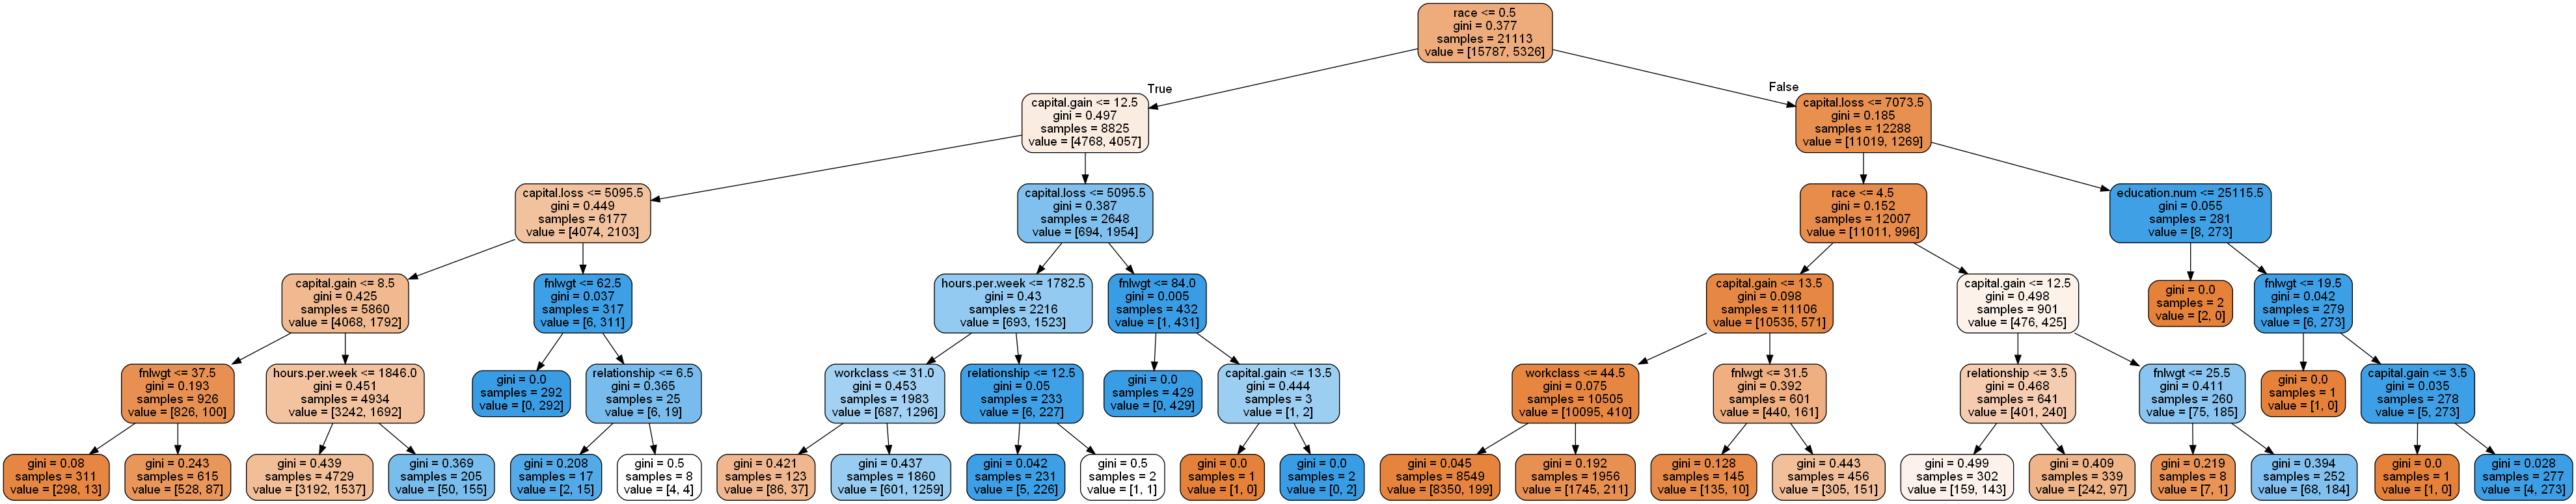

In [28]:
# plotting tree with max_depth=3
dot_data = StringIO()  
export_graphviz(dt_default, out_file=dot_data,
                feature_names=features, filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

# hyper parameter tuning

In [29]:
help(DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree.tree:

class DecisionTreeClassifier(BaseDecisionTree, sklearn.base.ClassifierMixin)
 |  DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort=False)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : string, optional (default="gini")
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "entropy" for the information gain.
 |  
 |  splitter : string, optional (default="best")
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to choose the best split and "random" to choose
 |      the best random split.

# Lets tune maxdepth

In [43]:
# we perfomr grid search to find optimal value of max_depth
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

n_folds=5
#parameter to tune
parameters = {'max_depth': range(1,40)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini",
                               random_state = 100)

#fit tree on training data
tree = GridSearchCV(dtree,parameters,cv=n_folds, scoring ="accuracy",return_train_score='warn')

tree.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=100,
                                              splitter='best'),
             iid='warn', n_jobs=None, param_grid={'max_depth': range(1, 40)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
             scoring

In [45]:
# scores of gridsearch
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.013601,0.003675,0.003703,0.003631,1,{'max_depth': 1},0.747633,0.747810,0.747750,0.747750,...,0.747738,0.000058,39,0.747765,0.747721,0.747735,0.747735,0.747735,0.747738,0.000014
1,0.017912,0.002387,0.000400,0.000800,2,{'max_depth': 2},0.812027,0.818849,0.820464,0.825675,...,0.819969,0.004590,16,0.821955,0.820249,0.819845,0.818542,0.819253,0.819969,0.001148
2,0.023827,0.000254,0.002402,0.000200,3,{'max_depth': 3},0.828362,0.834478,0.834439,0.836570,...,0.834273,0.003188,12,0.836047,0.834517,0.834468,0.833758,0.833758,0.834510,0.000836
3,0.029527,0.000328,0.002102,0.000200,4,{'max_depth': 4},0.832386,0.841108,0.842492,0.842729,...,0.840193,0.003944,9,0.841672,0.839432,0.845006,0.838908,0.845421,0.842088,0.002719
4,0.033923,0.000200,0.002402,0.000200,5,{'max_depth': 5},0.834044,0.847975,0.847229,0.842729,...,0.843888,0.005272,7,0.844337,0.847010,0.849328,0.841572,0.849683,0.846386,0.003075


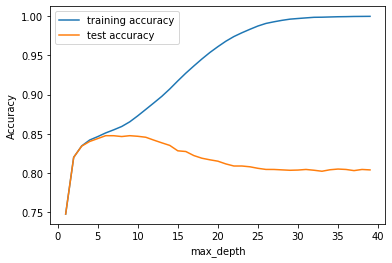

In [46]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

You can see that as we increase the value of max_depth, both training and test score increase till about max-depth = 10, after which the test score gradually reduces. Note that the scores are average accuracies across the 5-folds.

Thus, it is clear that the model is overfitting the training data if the max_depth is too high. Next, let's see how the model behaves with other hyperparameters.

# tuning min_samples_leaf 
 The no of data required to be at leaf

In [47]:
# we perfomr grid search to find optimal value of min_samples_leaf
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

n_folds=5
#parameter to tune
parameters = {'min_samples_leaf': range(5,200,20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini",
                               random_state = 100)

#fit tree on training data
tree = GridSearchCV(dtree,parameters,cv=n_folds, scoring ="accuracy",return_train_score='warn')

tree.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=100,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'min_samples_leaf': range(5, 200, 20)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score='wa

In [48]:
# scores of gridsearch
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.093240,0.007138,0.001801,1.470872e-03,5,{'min_samples_leaf': 5},0.826705,0.827137,0.819517,0.826149,...,0.823663,0.003695,10,0.915566,0.912789,0.915340,0.912083,0.913149,0.913785,0.001406
1,0.068756,0.003049,0.002698,2.412197e-04,25,{'min_samples_leaf': 25},0.840672,0.849396,0.839413,0.842018,...,0.844172,0.004330,6,0.867902,0.869390,0.871233,0.867503,0.869872,0.869180,0.001355
2,0.061644,0.000861,0.002502,1.507891e-07,45,{'min_samples_leaf': 45},0.842803,0.850580,0.846518,0.851018,...,0.848529,0.003391,1,0.861034,0.860036,0.862590,0.860399,0.863714,0.861554,0.001389
3,0.058341,0.000928,0.002602,2.002480e-04,65,{'min_samples_leaf': 65},0.840909,0.854369,0.845334,0.851492,...,0.846114,0.006054,2,0.857600,0.855832,0.858564,0.855189,0.858149,0.857067,0.001323
4,0.056542,0.002393,0.002702,2.451260e-04,85,{'min_samples_leaf': 85},0.837831,0.850580,0.845334,0.851492,...,0.845451,0.005151,4,0.853159,0.854174,0.855663,0.854005,0.854597,0.854320,0.000818


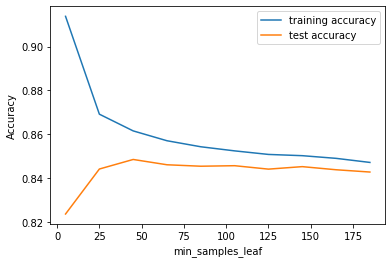

In [49]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

low values of min_samples_leaf, the tree gets a bit overfitted. At values > 100, however, the model becomes more stable and the training and test accuracy start to converge.

# tuning min_samples_split
min number of data to be present in a node to split it further

In [50]:
# we perfomr grid search to find optimal value of min_samples_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

n_folds=5
#parameter to tune
parameters = {'min_samples_split': range(5,200,20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini",
                               random_state = 100)

#fit tree on training data
tree = GridSearchCV(dtree,parameters,cv=n_folds, scoring ="accuracy",return_train_score='warn')

tree.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=100,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'min_samples_split': range(5, 200, 20)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score='w

In [51]:
# scores of gridsearch
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.106794,0.004206,0.003203,0.000245,5,{'min_samples_split': 5},0.808949,0.811508,0.818333,0.811701,...,0.811775,0.003537,10,0.969270,0.968857,0.969510,0.970458,0.971227,0.969865,0.000861
1,0.107883,0.010337,0.003607,0.000587,25,{'min_samples_split': 25},0.824574,0.828795,0.830175,0.822596,...,0.826742,0.002778,9,0.907336,0.905092,0.906992,0.906577,0.911847,0.907569,0.002272
2,0.095387,0.002664,0.003404,0.000375,45,{'min_samples_split': 45},0.837358,0.840635,0.830175,0.827333,...,0.834841,0.005156,8,0.891290,0.889343,0.889823,0.888521,0.896335,0.891062,0.002786
3,0.099479,0.006061,0.003705,0.000401,65,{'min_samples_split': 65},0.841856,0.846555,0.837518,0.833728,...,0.840714,0.004575,7,0.884481,0.881883,0.883251,0.880765,0.884258,0.882928,0.001418
4,0.090968,0.002051,0.003006,0.000320,85,{'min_samples_split': 85},0.847775,0.853895,0.838939,0.837281,...,0.844645,0.006044,6,0.878086,0.876199,0.879522,0.875081,0.880706,0.877919,0.002067


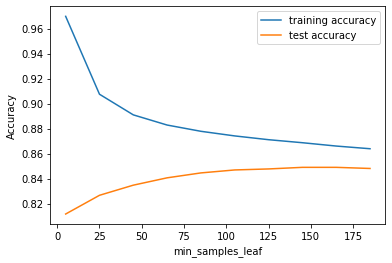

In [53]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

It shows that as we increase min_samples_split the tree overfit lessen


As we saw how the decision tree varies on different hyper parameter

Now we will use gridsearch to find min value of all the parameters

# To find optimal of all hyper parameters

In [56]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]  # here we also check if splitting on entropy gives better accuracy or gini
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    4.8s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 15, 5),
                      

In [57]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.052442,0.003479,0.002608,4.935641e-04,entropy,5,50,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.834044,0.844187,0.840360,0.845097,0.845334,0.841804,0.004273,13
1,0.048444,0.000866,0.002705,4.026588e-04,entropy,5,50,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.834044,0.844187,0.840360,0.845097,0.845334,0.841804,0.004273,13
2,0.048742,0.001249,0.002803,2.455736e-04,entropy,5,100,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.834044,0.842766,0.840360,0.845097,0.845808,0.841614,0.004241,15
3,0.043414,0.006317,0.001301,1.078150e-03,entropy,5,100,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.834044,0.842766,0.840360,0.845097,0.845808,0.841614,0.004241,15
4,0.077685,0.001246,0.003002,6.143617e-07,entropy,10,50,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.842330,0.851764,0.847229,0.854334,0.853861,0.849903,0.004545,3
5,0.077157,0.001066,0.002903,2.000573e-04,entropy,10,50,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.842330,0.851764,0.847229,0.854334,0.853861,0.849903,0.004545,3
6,0.073093,0.000999,0.002903,4.901059e-04,entropy,10,100,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.844934,0.852711,0.847466,0.854098,0.845571,0.848956,0.003752,5
7,0.073573,0.001355,0.002603,4.900183e-04,entropy,10,100,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.844934,0.852711,0.847466,0.854098,0.845571,0.848956,0.003752,5
8,0.040328,0.000603,0.002503,4.473412e-04,gini,5,50,50,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.834044,0.847975,0.847466,0.845097,0.847466,0.844409,0.005279,9
9,0.040432,0.000494,0.002802,2.395168e-04,gini,5,50,100,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.834044,0.847975,0.847466,0.845097,0.847466,0.844409,0.005279,9


In [58]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.8514659214701843
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


Running the model with best parameters obtained from grid search.

In [59]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

In [60]:
# accuracy score
clf_gini.score(X_test,y_test)

0.850922753895458

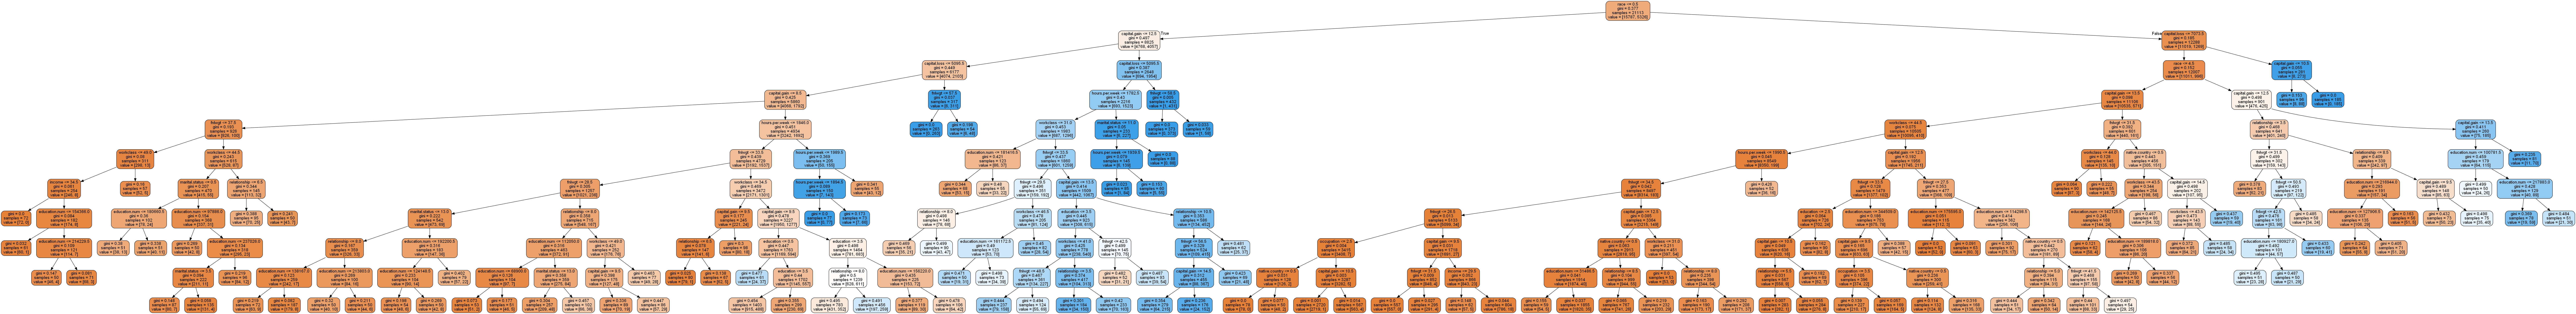

In [62]:
# plotting the tree
dot_data = StringIO()  
export_graphviz(clf_gini, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

The above is the final and best Decision Tree

In [63]:
# classification metrics
from sklearn.metrics import classification_report,confusion_matrix
y_pred = clf_gini.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90      6867
           1       0.73      0.60      0.66      2182

    accuracy                           0.85      9049
   macro avg       0.81      0.77      0.78      9049
weighted avg       0.84      0.85      0.85      9049



In [64]:
# confusion matrix
print(confusion_matrix(y_test,y_pred))

[[6383  484]
 [ 865 1317]]
